# X-ray Image Classification

---



In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Copy\ of\ chest_xray-20250726T110654Z-1-001.zip -d /content/drive/MyDrive/


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1192-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1202-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1176-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1261-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1188-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL

In [ ]:
# setting the training data directory
DataDir = "/content/drive/MyDrive/X ray/chest_xray/train"

In [ ]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

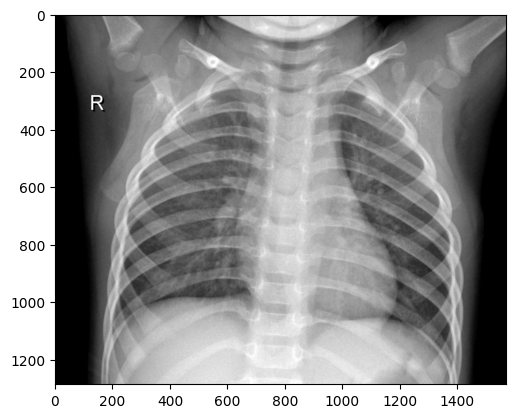

In [ ]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [ ]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

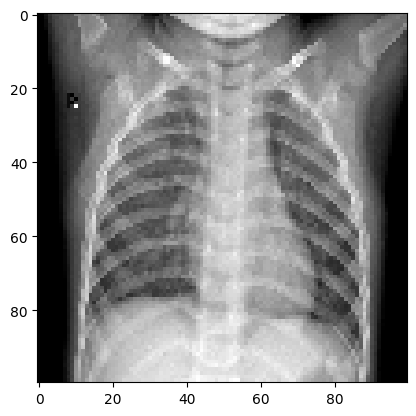

In [ ]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

In [ ]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

5226


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[ 0,  0,  0, ..., 60, 45, 23],
       [ 0,  0,  0, ..., 55, 42, 23],
       [ 0,  0,  0, ..., 52, 40, 24],
       ...,
       [ 0,  0, 11, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[97, 41, 20, ..., 15, 15, 15],
       [89, 15, 22, ..., 14, 13, 14],
       [79, 17, 20, ..., 11, 12, 14],
       ...,
       [31, 27, 24, ..., 20, 20, 20],
       [29, 27, 28, ..., 20, 20, 18],
       [27, 32, 44, ..., 20, 20, 20]], dtype=uint8), 1]
[array([[ 89, 159, 132, ...,  89,  88,  90],
       [ 84, 148, 139, ...,  90,  92, 126],
       [ 84, 139, 127, ...,  88,  91, 176],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[ 38,  50,  55, ...,  23,  32,  41],
       [ 40,  42,  49, ...,  39,  36,  47],
       [ 31,  37,  42, ...,  42,  42,  44],
       ...,
       [  0,   0,   0, ..., 116,  76,  20]

In [ ]:
X=[]
y=[]

In [ ]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[ 0]
   [ 0]
   [ 0]
   ...
   [60]
   [45]
   [23]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [55]
   [42]
   [23]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [52]
   [40]
   [24]]

  ...

  [[ 0]
   [ 0]
   [11]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [11]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [15]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [ ]:
y = np.array(y)

In [ ]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [ ]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= "/content/extracted_files/chest_xray/val"

In [ ]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_validating_data()
print(len(validation_data))

16


In [ ]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,   8,  24, ...,  65,  61, 103],
       [  0,   3,  23, ...,  67,  59, 121],
       [  1,   0,  18, ...,  61,  58, 123],
       ...,
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2]], dtype=uint8), 1]
[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[ 2, 17, 31, ..., 95, 86, 68],
       [ 6, 14, 25, ..., 94, 68, 62],
       [ 2, 10, 23, ..., 88, 73, 60],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       ...,
       [  3,   3,   3, ..., 222,  51,   7]

In [ ]:
X_val=[]
y_val=[]

In [ ]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [ ]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [ ]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [ ]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [ ]:
X.shape

(5226, 100, 100, 1)

In [ ]:
x_val.shape

(16, 100, 100, 1)

In [ ]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 300s 228ms/step - accuracy: 0.8256 - loss: 0.4320 - val_accuracy: 0.8750 - val_loss: 0.2525
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 303s 232ms/step - accuracy: 0.9525 - loss: 0.1373 - val_accuracy: 0.9375 - val_loss: 0.1102
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 325s 234ms/step - accuracy: 0.9559 - loss: 0.1220 - val_accuracy: 1.0000 - val_loss: 0.0672
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 317s 230ms/step - accuracy: 0.9686 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0281
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 324s 232ms/step - accuracy: 0.9679 - loss: 0.0937 - val_accuracy: 0.8750 - val_loss: 0.2278
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 298s 228ms/step - accuracy: 0.9719 - loss: 0.0883 - val_accuracy: 0.8125 - val_loss: 0.3466
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 328s 232ms/step - accuracy: 0.9719 - loss: 0.0789 - val_accuracy: 0.6875 - val_loss: 0.5451
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 316s 228ms/step - ac

In [ ]:
# saving the model
model.save(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [ ]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [ ]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [ ]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE) # Comment out or remove this line
    img=tf.keras.preprocessing.image.load_img(image, color_mode='rgb', target_size=(img_size,img_size)) # Change color_mode to 'rgb'
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,3) # Change the reshape to have 3 channels

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [ ]:
image  = "/content/extracted_files/chest_xray/test/NORMAL/IM-0059-0001.jpeg"

In [ ]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.00023524]]
0
NORMAL


In [ ]:
image2 = '/content/extracted_files/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'


In [ ]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.99997026]]
1
PNEUMONIA


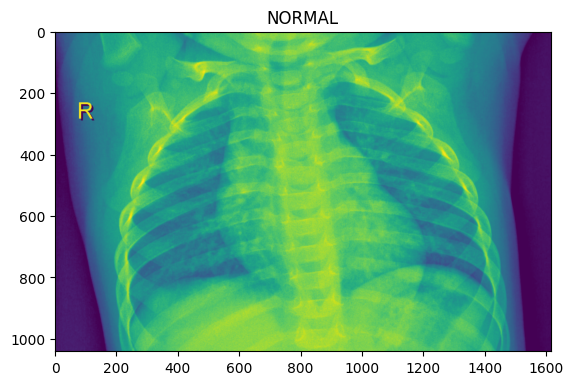

In [ ]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

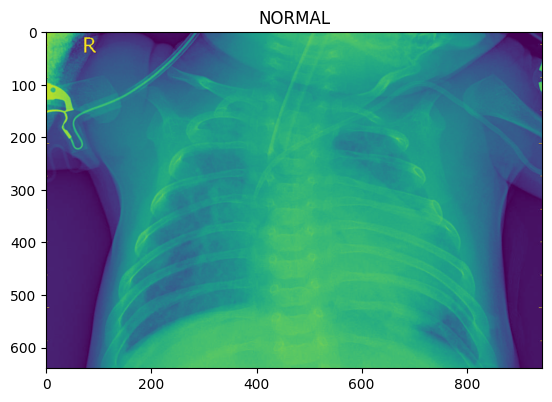

In [ ]:
img=mpimg.imread(image2)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [ ]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "/content/extracted_files/chest_xray/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5')

# compile the loaded model with the original metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)

20/20 - 8s - 423ms/step - accuracy: 0.7853 - loss: 1.1981
Test accuracy: 0.7852563858032227


## Pre-Trained Models

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir = '/content/extracted_files/chest_xray/train'
val_dir = '/content/extracted_files/chest_xray/val'

# create the image generators for training and validation data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

# train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# evaluate the model on test data
test_dir = '/content/extracted_files/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: '/content/extracted_files/chest_xray/train'

In [ ]:
# saving the pre-trained model
model.save(r"/content/extracted_files/chest_xray/custom_pre_trained_model_10.h5")

NameError: name 'model' is not defined

In [ ]:
model = tf.keras.models.load_model("/content/extracted_files/chest_xray/custom_pre_trained_model_10.h5")

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_2 (InputLayer)            │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,935,811 (60.79 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


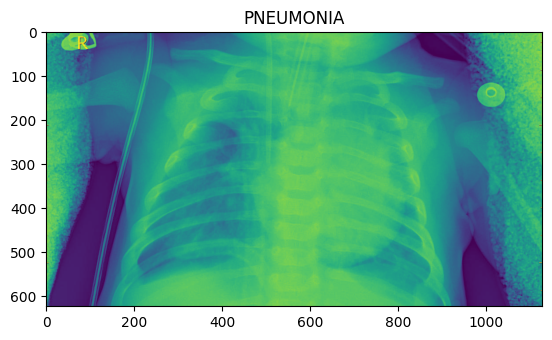

In [ ]:
# Replace with the path to your new image
new_image_path = "/content/extracted_files/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg" # Example image from your dataset

# Prepare the new image
prepared_image = prepare(new_image_path) / 255.0

# Make a prediction
prediction = model.predict([prepared_image])



# Display the image with the predicted label
img = mpimg.imread(new_image_path)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


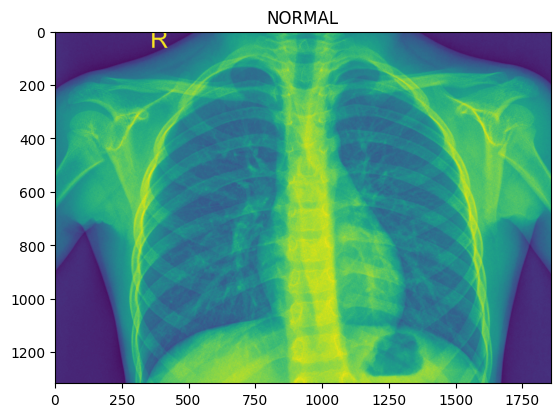

In [ ]:
# Replace with the path to your new image
new_image_path_2 = "/content/extracted_files/chest_xray/test/NORMAL/IM-0001-0001.jpeg" # Example image from your dataset

# Prepare the new image
prepared_image_2 = prepare(new_image_path_2) / 255.0

# Make a prediction
prediction_2 = model.predict([prepared_image_2])



# Display the image with the predicted label
img = mpimg.imread(new_image_path_2)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction_2[0][0]))])
plt.show()